In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import statsmodels.api as sm
from numpy.random import default_rng

<h2>Module 3, Assignment 17</h2>

<h3>Part 1: Read the mario data</h3>

In [2]:
data_file = "mario_file.json"
with open(data_file, 'r') as mario_file:
    data = json.loads(mario_file.read())

print(f"Number of items: {len(data)}")

# Response
popularity = []

# Predictors
likes = []
boos = []
num_comments = []
for item in data:
    i_attempts, i_likes, i_boos, i_comments, i_record, i_upload_time = item["attempts"], item["likes"], item["boos"], item["num_comments"], item["world_record"], item["upload_time"]
    # Discard data with less than 50 in any of these categories
    min_value = 0
    if i_attempts < min_value or i_likes < min_value or i_boos < min_value or i_comments < min_value:
        continue
    weight = .8
    average_time = i_record * weight + i_upload_time * (1-weight)
    popularity.append(i_attempts * average_time)
    likes.append(i_likes)
    boos.append(i_boos)
    num_comments.append(i_comments)

popularity = np.array(popularity)
likes = np.array(likes)
boos = np.array(boos)
num_comments = np.array(num_comments)

Number of items: 20001


<h3>Part 2: Plot Mario Data</h3>

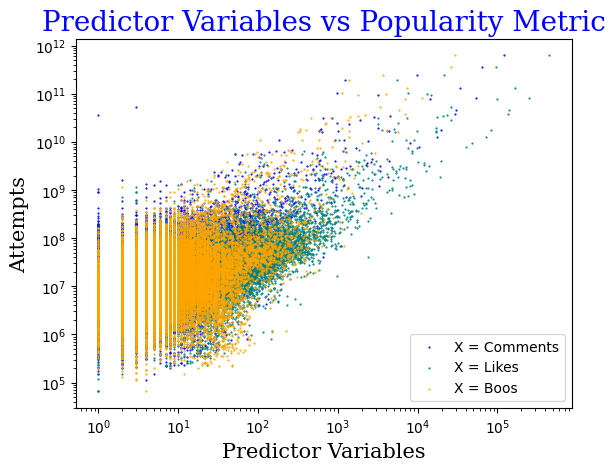

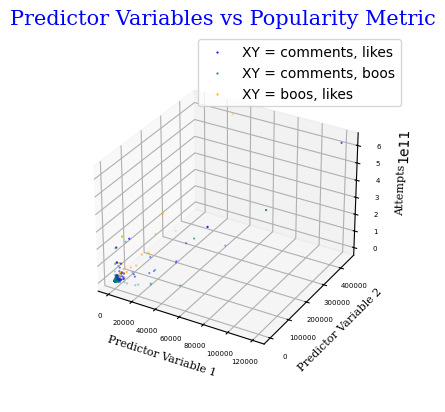

In [3]:
font1 = {'family':'serif','color':'black','size':15}
font2 = {'family':'serif','color':'blue','size':20}
plt.xlabel("Predictor Variables", fontdict=font1)
plt.ylabel("Attempts", fontdict=font1)
plt.title("Predictor Variables vs Popularity Metric", fontdict=font2)
dot_size = .3

plt.xscale("log")
plt.yscale("log")
plt.scatter(num_comments, popularity, s=dot_size, color="blue")
plt.scatter(likes, popularity, s=dot_size, color="teal")
plt.scatter(boos, popularity, s=dot_size, color="orange")
plt.legend(("X = Comments", "X = Likes", "X = Boos"))

plt.show()

font3 = {'family':'serif','color':'black','size':8}
font4 = {'family':'serif','color':'blue','size':15}
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(num_comments, likes, popularity, '^', s=dot_size, color="blue")
ax.scatter(num_comments, boos, popularity, s=dot_size, color="teal")
ax.scatter(boos, likes, popularity, s=dot_size, color="orange")
ax.legend(("XY = comments, likes", "XY = comments, boos", "XY = boos, likes"))
ax.set_xlabel("Predictor Variable 1", fontdict=font3)
ax.set_ylabel("Predictor Variable 2", fontdict=font3)
ax.set_zlabel("Attempts", fontdict=font3)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.set_title("Predictor Variables vs Popularity Metric", fontdict=font4)
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

<h3>Box 1: Background</h3>

<h4>
We are interested in studying the Mario Maker data because it can give us insights into what types of interactions are most facilitative of player engagement.
    
This kind of analysis has analogies to social media algorithms, which are largely a complete mystery to the people who use them, though they exert major influence over our lives.

According to <a href="https://www.pewresearch.org/internet/2024/02/22/how-u-s-adults-use-tiktok/">Pew Research</a>, "Some 85% of TikTok users say the content on their “For You” page is at least somewhat interesting, including 40% who call it either extremely or very interesting. Only 14% say it is not too or not at all interesting." Most people using these applications are primarily consuming content served to them by the algorithm, so it would be interesting to gain insight into how a social media algorithm may select content for its users.
</h4>

<h3>Box 2: Description of Data</h3>

<h4>
The data I am working with compares comments, likes, and boos against # of total attempts played for a given mario maker level. I have plotted it on a log-log scale, because the amount of data points at any given linear scale decreases in density as the magnitude of the point increases. This results in the graph being extremely sparse if it is plotted linearly.

There appears to be a positive relationship between [comments, likes, boos], and total attempts. Boos appear to be the least visually correlated with attempts, and likes appear to be the MOST visually correlated.
</h4>

<h2>Module 3, Assignment 18</h2>

In [8]:
# y_i = beta_1 + beta_2 * x_i + e_i

mean_popularity = np.mean(popularity)
popularity_deviation = popularity - mean_popularity
n = len(popularity)

def p_value(t_stat, degrees_freedom):
    return 2*(1 - t.cdf(np.abs(t_stat), degrees_freedom))

def estimate_parameters(predictor):
    mean = np.mean(predictor)
    deviation = predictor - mean
    beta_2 = np.dot(deviation, popularity) / np.dot(deviation, deviation)
    beta_1 = mean_popularity - mean * beta_2
    model_deviation = popularity - (beta_1 + beta_2 * predictor)
    # Estimate of model variance
    model_variance = 1/(n-2) * np.dot(model_deviation, model_deviation)
    var_beta_1 = 1/n * model_variance * np.dot(predictor, predictor) / np.dot(deviation, deviation)
    var_beta_2 = model_variance / np.dot(deviation, deviation)
    stdev_1 = var_beta_1 ** .5
    stdev_2 = var_beta_2 ** .5
    t_1 = beta_1 / stdev_1
    t_2 = beta_2 / stdev_2

    degrees_freedom = n-2
    p_1 = p_value(t_1, degrees_freedom)
    p_2 = p_value(t_2, degrees_freedom)

    params = [beta_1, beta_2, stdev_1, stdev_2, t_1, t_2, p_1, p_2]
    return params
    
print("beta_1, beta_2, stdev_beta_1, stdev_beta_2, t_1, t_2, p_1, p_2")
likes_params = estimate_parameters(likes)
comments_params = estimate_parameters(num_comments)
boos_params = estimate_parameters(boos)
print(f"{["%.2E" % param for param in likes_params]}\n{["%.2E" % param for param in comments_params]}\n{["%.2E" % param for param in boos_params]}")

beta_1, beta_2, stdev_beta_1, stdev_beta_2, t_1, t_2, p_1, p_2
['8.55E+06', '1.07E+06', '2.62E+07', '6.10E+03', '3.26E-01', '1.75E+02', '7.44E-01', '0.00E+00']
['1.74E+07', '4.46E+06', '2.14E+07', '1.88E+04', '8.14E-01', '2.37E+02', '4.15E-01', '0.00E+00']
['-2.83E+08', '1.62E+07', '1.97E+07', '6.10E+04', '-1.44E+01', '2.66E+02', '0.00E+00', '0.00E+00']


<h3>Question 3: what do these parameters mean?</h3>
<h4>
The coefficient beta_1 is the average amount of time, in milliseconds, each line expects a game with zero of the given predictor to be played.

We see that for likes and comments, average playtime for 0 likes/comments is a hugely positive number, whereas it is hugely negative for boos. This suggests that a linear fit does not properly model our mario maker level data, because if it did then we would expect strictly positive values for beta_1. The t-statistics tell us how many standard deviations each parameter is from zero, based on our estimate of built-in model variance. The fact that all of our beta_2 values are on the order of 100-300 means there is an undeniable correlation between all 3 variables and time played, so much so that the p values are literally zero because they are beyond 64 bit floating point precision.

The fact that our p values beta_1 are close to 0 means that the model has very little confidence in the expected baseline of time played vs interactions, which seems reasonable because most of our data points have a small number of interactions so there can be a level with 50 attempts but maybe 2 comments, or an extremely infurating level with a LOT of comments and boos, but very little likes, and the great amount of these cases makes beta_1 extremely uncertain.

The only predictor which had a very strong p value for beta_1 was boos, and boos also had a very high p-value for predicting beta_2. This means, based on this simple linear regression, boos have by far the most precision in predicting time played.
</h4>

<h3>Question 4: Predict 20 points</h3>

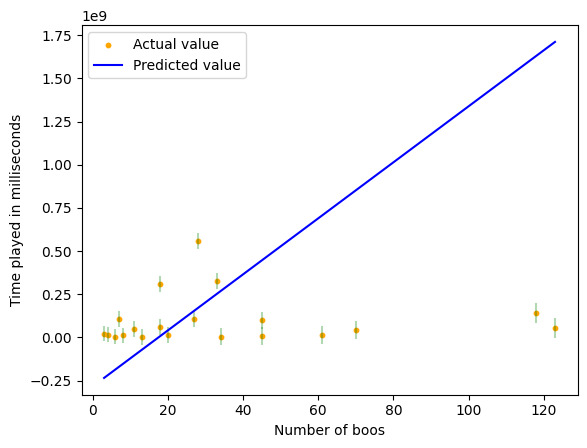

In [9]:
# We will choose boos as our predictor
beta_1, beta_2, stdev_1, stdev_2 = boos_params[:4]
# First 20 data points
sample_boos = boos[:20]
sample_popularity = popularity[:20]

min_boos = np.min(sample_boos)
max_boos = np.max(sample_boos)
predict = lambda val: beta_1 + beta_2 * val
x1, y1 = min_boos, predict(min_boos)
x2, y2 = max_boos, predict(max_boos)



horizontal_line_width=0.25
color='#2187bb'
z=1.96
# Estimate the stdev at a point x as the stdev on beta1 + x*stdev_beta_2
# not sure if this is correct...
stdev_estimate = stdev_1 + sample_boos * stdev_2

for x_val, y_val, stdev in zip(sample_boos, sample_popularity, stdev_estimate):
    error_bound = z * stdev
    lower_bound = y_val - error_bound
    upper_bound = y_val + error_bound
    plt.plot([x_val, x_val], [lower_bound, upper_bound], color="green", alpha=.3)
dot_size = 10
plt.scatter(sample_boos, sample_popularity, s=dot_size, color="orange", label="Actual value")
plt.plot([x1, x2], [y1, y2], color="blue", label="Predicted value")
plt.legend()
plt.xlabel("Number of boos")
plt.ylabel("Time played in milliseconds")
    
plt.show()



In [12]:
# 4 parameters because we have 3 predictors in our linear regression
# Coefficient matrix for input data
# A * beta = y
A = np.zeros((n, 4))
A[:, 0] = 1
A[:, 1] = boos
A[:, 2] = likes
A[:, 3] = num_comments
# popularity = y
inverse_projection = np.linalg.inv(A.T @ A)
beta_estimate = inverse_projection @ (A.T @ popularity)
predicted_popularity = A @ beta_estimate
residuals = popularity - predicted_popularity
degrees_freedom = n-4
model_variance = np.dot(residuals, residuals) / degrees_freedom
stdev_beta = np.sqrt((inverse_projection * model_variance).diagonal())
t_statistics = beta_estimate / stdev_beta
print(f"Parameter estimates: {beta_estimate}")
print(f"Standard errors: {stdev_beta}")
print(f"T Statistics: {t_statistics}")
p_values = [p_value(t_stat, degrees_freedom) for t_stat in t_statistics]
print(f"P values: {p_values}")

Parameter estimates: [-1.62788275e+08  1.00980536e+07 -3.84686944e+05  3.18818909e+06]
Standard errors: [1.92762031e+07 1.76685555e+05 1.64141883e+04 8.94698575e+04]
T Statistics: [ -8.4450384   57.1526835  -23.43624538  35.63422563]
P values: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


<h3>Question 6: What do the numbers mean?</h3>
<h4>
All of our p values are 0 in machine precision, which basically just means our data set is so large and the correlations are so not random that we can statistically guarantee that each of the variables has SOME correlational value.

The parameters are beta = [-1.62788275e+08  1.00980536e+07 -3.84686944e+05  3.18818909e+06]

This means there is a positive relationship between boos and popularity, negative between likes and popularity, and positive between num_comments and popularity

Notably, the boos have the strongest positive relationship with popularity
</h4>

In [11]:
rng = default_rng()
num_samples = 20
indices = rng.choice(n, size=num_samples, replace=False)
sample_boos = np.take(boos, indices)
sample_likes = np.take(likes, indices)
sample_comments = np.take(num_comments, indices)
sample_popularity = np.take(popularity, indices)
predictor_values = np.array([sample_boos, sample_likes, sample_comments])
A = np.zeros((num_samples, 4))
A[:, 0] = 1
A[:, 1] = sample_boos
A[:, 2] = sample_likes
A[:, 3] = sample_comments
predicted_popularity = A @ beta_estimate
stdev_estimates = A @ stdev_beta

z = 1.96
confidence_lower_bound = predicted_popularity - stdev_estimates* z
confidence_upper_bound = predicted_popularity + stdev_estimates * z
print("[Boos, Likes, Comments], Predicted Popularity, Actual Popularity, Lower Bound Confidence -- Upper Bound Confidence")
for predictors, predic_pop, actual_pop, lower_bound, upper_bound in zip(A[:, 1:], predicted_popularity, sample_popularity, confidence_lower_bound, confidence_upper_bound):
    print(f"{predictors}, {"%.5E" % predic_pop}, {"%.5E" % actual_pop}, {"%.5E" % lower_bound} -- {"%.5E" % upper_bound}")

[Boos, Likes, Comments], Predicted Popularity, Actual Popularity, Lower Bound Confidence -- Upper Bound Confidence
[4. 1. 0.], -1.22781E+08, 3.17195E+06, -1.61979E+08 -- -8.35820E+07
[1. 0. 1.], -1.49502E+08, 5.82569E+06, -1.87805E+08 -- -1.11199E+08
[4. 4. 1.], -1.20747E+08, 1.11219E+07, -1.60217E+08 -- -8.12760E+07
[ 7. 73. 13.], -7.87376E+07, 3.77702E+07, -1.23571E+08 -- -3.39039E+07
[5. 4. 0.], -1.13837E+08, 9.66220E+06, -1.53478E+08 -- -7.41952E+07
[7. 7. 0.], -9.47947E+07, 1.11541E+07, -1.35225E+08 -- -5.43640E+07
[13.  5.  4.], -2.06843E+07, 8.56496E+06, -6.38299E+07 -- 2.24614E+07
[15. 46.  3.], -1.94485E+07, 1.42689E+07, -6.44304E+07 -- 2.55334E+07
[29. 88. 37.], 2.14166E+08, 1.35960E+07, 1.57022E+08 -- 2.71309E+08
[3. 2. 3.], -1.23699E+08, 1.22633E+06, -1.63110E+08 -- -8.42882E+07
[11. 41. 15.], -1.96590E+07, 2.46349E+07, -6.51992E+07 -- 2.58811E+07
[33. 87. 17.], 1.91179E+08, 1.92768E+07, 1.36189E+08 -- 2.46168E+08
[27. 15.  4.], 1.16842E+08, 2.05789E+06, 6.85260E+07 -- 1.65

<h3>Question 8: What is the difference?</h3>
<h5>
Linear regression doesn't seem like an amazing model for this data set, because we are predicting negative popularity values, which are actually not physically possible.

It seems like our model works the worst on mario maker levels with limited boos, likes, and comments, because the overwhelmingly negative beta_0 value predicts a negative popularity for these

It appears that the most important predictor for level popularity is boos. Levels with more boos receive more plays, while the other variables have inconsistent relationships with popularity

I am not certain that a linear model is great, but I'm also not sure what OTHER model could be used besides a linear one, as the data looks kind of random/sporadic when plotted, but with a general positive linear trend
</h5>

<h2>Module 3 Assignment 19</h2>

In [123]:
classified_popularity = (popularity > mean_popularity) * 1.
popular_proportion = np.sum(classified_popularity) / n
print(f"Number of 'Popular' Levels: {np.sum(classified_popularity)} == {popular_proportion}")
# Levels which are more popular than the mean are 1, otherwise 0

# normally i would do this logistic regression through some amazing beautiful home cooked algorithm
# however, this course gives me no incentive to do so, and the textbook simply imports the relevant library and smushes the data through it to get a result
# so that is exactly what i will do.

# i have taken the log of the input data because it will not converge otherwise.
# is this scientific? who knows. nobody knows. is anyone reading this? again, nobody knows. i am a ghost screaming into the void at nothing. one day i will die,
# and history will forget my mathematical sins
# we will all be forgotten
input_data = np.log(np.array([boos, likes, num_comments]).T + 1)
log_reg = sm.Logit(classified_popularity, input_data).fit(method="bfgs")
log_reg.summary()

Number of 'Popular' Levels: 785.0 == 0.039248037598120095
Optimization terminated successfully.
         Current function value: 0.231639
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                20001
Model:                          Logit   Df Residuals:                    19998
Method:                           MLE   Df Model:                            2
Date:                Thu, 01 May 2025   Pseudo R-squ.:                 -0.3992
Time:                        23:43:08   Log-Likelihood:                -4633.0
converged:                       True   LL-Null:                       -3311.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9064      0.042    -45.562      0.000      -1.988      -1.824
x2            -0.6523      0.040    -16.391      0.000      -0.730      -0.574
x3             1.9212      0.061     31.555      0.000       1.802       2.041
==============================================================================
"""

<h3>What do these numbers mean?</h3>
<h5>
The z statistics are all on the order of 30, which means our confidence that each of the independent variables are correlated to the popularity of the game is UNDENIABLE.
Notably, now that we are looking at classifying levels as above or below the ARITHMETIC MEAN of popularity, boos are a NEGATIVE correlation with popularity.
    
Our arithmetic mean provides significantly greater weight to the upper end of games, so this means that the most highly popular games tend to be well liked and not highly booed, whereas the low popularity games actually gain popularity from being booed.
</h5>

In [136]:
# Predicting 20 points...
num_samples = 20
indices = rng.choice(n, size=num_samples, replace=False)
sample_data = np.array([boos[indices], likes[indices], num_comments[indices]]).T
predicted_popularity = [round(val) for val in log_reg.predict(sample_data)]
actual_popularity = classified_popularity[indices]
was_correct = [prediction == actual for prediction, actual in zip(predicted_popularity, actual_popularity)]
print(sum(was_correct) / num_samples)
print(1 - popular_proportion)
# in the average case, our model performs no better than just predicting that every level will be unpopular
# everything we know is a lie.
print("index, (sample_boo, sample_like, sample_comment), prediction, actual")
for index, (sample_boo, sample_like, sample_comment), prediction, actual in zip(range(num_samples), sample_data, predicted_popularity, actual_popularity):
    print(index, (sample_boo, sample_like, sample_comment), prediction, actual)

0.95
0.9607519624018799
index, (sample_boo, sample_like, sample_comment), prediction, actual
0 (np.int64(5), np.int64(8), np.int64(3)) 0 0.0
1 (np.int64(11), np.int64(6), np.int64(2)) 0 0.0
2 (np.int64(23), np.int64(230), np.int64(39)) 0 1.0
3 (np.int64(4), np.int64(9), np.int64(0)) 0 0.0
4 (np.int64(16), np.int64(73), np.int64(18)) 0 0.0
5 (np.int64(4), np.int64(8), np.int64(3)) 0 0.0
6 (np.int64(13), np.int64(88), np.int64(24)) 0 0.0
7 (np.int64(21), np.int64(60), np.int64(11)) 0 0.0
8 (np.int64(4), np.int64(2), np.int64(2)) 0 0.0
9 (np.int64(120), np.int64(287), np.int64(103)) 0 0.0
10 (np.int64(13), np.int64(27), np.int64(9)) 0 0.0
11 (np.int64(14), np.int64(46), np.int64(10)) 0 0.0
12 (np.int64(9), np.int64(3), np.int64(1)) 0 0.0
13 (np.int64(9), np.int64(45), np.int64(2)) 0 0.0
14 (np.int64(12), np.int64(43), np.int64(11)) 0 0.0
15 (np.int64(18), np.int64(21), np.int64(2)) 0 0.0
16 (np.int64(7), np.int64(12), np.int64(2)) 0 0.0
17 (np.int64(43), np.int64(250), np.int64(55)) 0 0.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch 
import torch.nn as nn
import torch.optim as optim

#set print width to infinity
pd.set_option('display.width', 10000)

In [3]:
mario_data = pd.read_json('mario_file.json')


weight = .8
mario_data['engagement'] = mario_data['attempts']*(weight*mario_data['upload_time']+(1-weight)*mario_data['world_record'])

#drop columns used to construct engagement
mario_data = mario_data.drop(columns=['attempts', 'upload_time', 'world_record'])

#print range of each column
for col in mario_data.columns:
    print(f"{col}: {mario_data[col].min()}, {mario_data[col].max()}")

#log all columns
for col in mario_data.columns:
    mario_data[col] = np.log(mario_data[col]+1)
print()

#print range of each column
for col in mario_data.columns:
    print(f"{col}: {mario_data[col].min()}, {mario_data[col].max()}")

print()
print(mario_data.head())
print(mario_data.columns)

mario_data.dtypes


num_comments: 0, 120515
clears: 0, 1094911
plays: 5, 1701547
likes: 0, 446275
boos: 0, 29632
engagement: 66984.0, 888443714191.0

num_comments: 0.0, 11.69953780318134
clears: 0.0, 13.90618455270647
plays: 1.791759469228055, 14.347048982927777
likes: 0.0, 13.008692873684067
boos: 0.0, 10.296643884176694
engagement: 11.112223992711087, 27.51273713328517

   num_comments    clears     plays     likes      boos  engagement
0      4.110874  7.406711  7.441320  5.030438  4.779123   20.021295
1      0.000000  2.944439  4.158883  1.609438  1.945910   15.407772
2      4.317488  6.206576  6.708084  4.882802  4.820282   18.095203
3      4.110874  7.734559  7.778630  5.686975  3.332205   19.034167
4      3.218876  4.644391  5.983936  3.713572  3.828641   18.698310
Index(['num_comments', 'clears', 'plays', 'likes', 'boos', 'engagement'], dtype='object')


num_comments    float64
clears          float64
plays           float64
likes           float64
boos            float64
engagement      float64
dtype: object

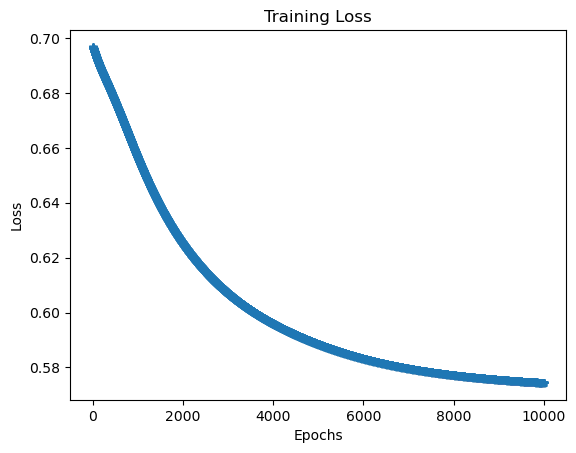

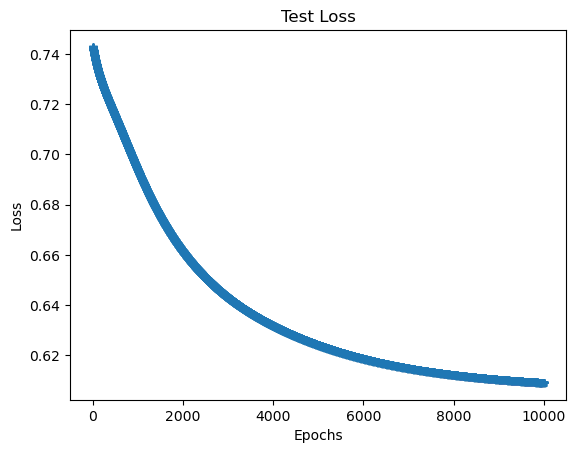

Prediction on Training Data
      num_comments    clears     plays     likes      boos  engagement  sales pred
0         4.110874  7.406711  7.441320  5.030438  4.779123           1         1.0
1         0.000000  2.944439  4.158883  1.609438  1.945910           0         0.0
2         4.317488  6.206576  6.708084  4.882802  4.820282           1         1.0
3         4.110874  7.734559  7.778630  5.686975  3.332205           1         1.0
4         3.218876  4.644391  5.983936  3.713572  3.828641           1         1.0
...            ...       ...       ...       ...       ...         ...         ...
9995      1.386294  4.691348  4.934474  2.397895  2.639057           0         0.0
9996      1.791759  3.912023  4.682131  3.295837  3.433987           0         1.0
9997      2.995732  6.510258  6.573680  4.110874  2.079442           1         1.0
9998      1.386294  2.397895  4.158883  1.609438  2.397895           0         0.0
9999      1.098612  4.442651  4.976734  2.708050  1.386294 

In [4]:
#Module 3 Assignment 19 
#Neural Nets

#Define the model network 
class MarioNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MarioNet, self).__init__()
        # Fully connected layer 1: input_size -> hidden_size
        self.fc1 = nn.Linear(input_size, hidden_size)
        # ReLU activation function
        self.relu = nn.ReLU()
        # Fully connected layer 2: hidden_size -> output_size 
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass input through layer 1
        out = self.fc1(x)
        # Apply ReLU activation
        out = self.relu(out)
        # Pass through layer 2 to get to output  
        out = self.fc2(out)
        # Apply sigmoid activation to get probabilities
        out = self.sigmoid(out)
        return out

mario_median = mario_data['engagement'].median()
mario_data['engagement'] = np.where(mario_data['engagement'] > mario_median, 1, 0)

train_n = int(0.5 * len(mario_data))

train_data = mario_data.iloc[:train_n]
test_data = mario_data.iloc[train_n:]

#split data into train, test input and output
train_input = train_data[train_data.columns[:-1].values].to_numpy()
train_output = train_data[train_data.columns[-1]].to_numpy()
test_input = test_data[test_data.columns[:-1].values].to_numpy()
test_output = test_data[test_data.columns[-1]].to_numpy()

#convert to torch tensors
train_inputs_tensor = torch.tensor(train_input, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_output, dtype=torch.float32).view(-1, 1)
test_inputs_tensor = torch.tensor(test_input, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_output, dtype=torch.float32).view(-1, 1)

#parameters for my dataset
input_size = 5 # tv, radio, and newspaper 
hidden_size = 16 # number of units in my hidden layer 
output_size = 1 #sales (I only have one output)  
#these parameters have to do with the iterative process of slow learning that i mentioned in class 
#to understand this better see the slides from Erica Rutter 
learning_rate = 0.0001 #eta in ER slides 
num_epochs = 10000 #how many times are we going to go through the full data set to train 
batch_size = train_n #how many data points in each batch - we are going to only have 1 batch 

# Create an instance of the network
model = MarioNet(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
loss_vector = np.empty(num_epochs, dtype=object)
test_loss = np.empty(num_epochs, dtype=object)

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(train_inputs_tensor)
    loss = criterion(outputs,train_labels_tensor)

    # Backward and optimize
    optimizer.zero_grad() # Clear gradients from the previous step
    loss.backward() # Compute gradients
    optimizer.step() # Update weights

    loss_vector[epoch] = loss.item()
    #print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    loss_test = criterion(model(test_inputs_tensor), test_labels_tensor)
    test_loss[epoch] = loss_test.item()

fig, (ax4) = plt.subplots(1, 1)
plt.plot(loss_vector,'*') 
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(test_loss,'*')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Make predictions first on training data (remember to apply sigmoid)
with torch.no_grad():
    predicted = model(train_inputs_tensor)
    predicted_classes = (predicted > 0.5).float()
    popularity_pred = predicted_classes.squeeze().numpy() 
    
    #making a table 
    train_pred = train_data.copy()
    train_pred['sales pred'] = popularity_pred
    print('Prediction on Training Data')
    print(train_pred)

    #plotting the predicted versus actual for the training data 
    #fig, (ax5) = plt.subplots(1, 1)
    #plt.plot(salestrain,'k*')
    #plt.plot(sales_clas_pred,'r+')

    #Classification Error 
    train_error = np.sum(np.absolute(train_output - popularity_pred))
    train_error_prop = train_error/train_n
    print('Training Error:',train_error,train_error_prop)

# Make predictions on test data (remember to apply sigmoid)
with torch.no_grad():
    predicted = model(test_inputs_tensor)
    predicted_classes = (predicted > 0.5).float()
    popularity_pred = predicted_classes.squeeze().numpy()
    #making a table 
    #test_pred = pandas.DataFrame({'tv':tvtest,'radio':radiotest,'newspaper':newspapertest,'sales':salestest,'sales pred':sales_clas_pred})
    #pandas.set_option('display.max_rows', None) 
    #print(test_pred)

    #plotting the predicted versus actual for the training data 
    #fig, (ax6) = plt.subplots(1, 1)
    #plt.plot(salestest,'k*')
    #plt.plot(sales_clas_pred,'r+')

    #Classification Error 
    test_error = np.sum(np.absolute(test_output - popularity_pred))
    test_error_prop = test_error/train_n
    print('Testing Error:',test_error,test_error_prop)
    
#Reference: ISLP Chapter 10
#Reference to Python torch library being used: https://pytorch.org/tutorials/beginner/basics/intro.html
#Googled and used Google AI overview: simple neural network using pytorch 
#Googled and used Google AI overview: simple neural network using pytorch and bcewithlogitsloss
#What loss function to use: https://discuss.pytorch.org/t/bce-loss-vs-cross-entropy/97437/5 and https://sebastianraschka.com/blog/2022/losses-learned-part1.html
#Slides from Erica Rutter: IntroMLCNNRNN_2024 start at slide 10 